<a href="https://colab.research.google.com/github/fothstatshs-design/PROJECTS/blob/main/Canata_imigrants_by_continent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matplotlib version:  3.10.0
Data read into a pandas dataframe!
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


/tmp/ipython-input-2294414782.py:31: FutureWarning:

The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.

/tmp/ipython-input-2294414782.py:35: FutureWarning:

The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.



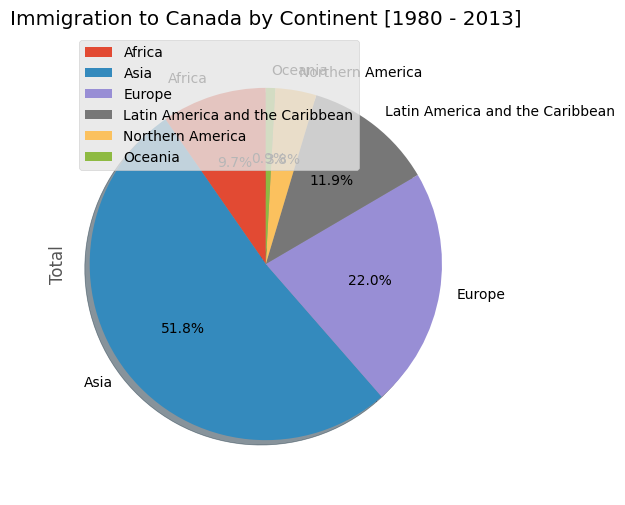

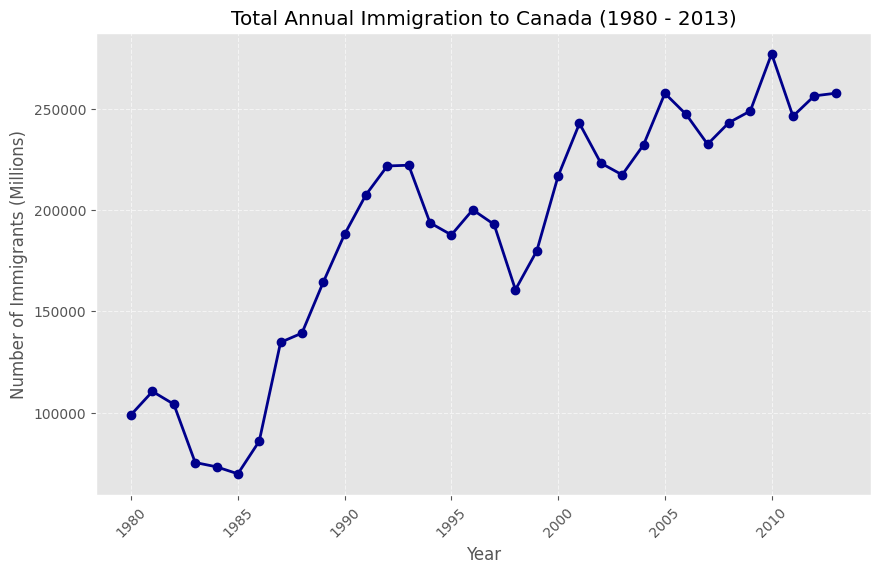

In [11]:

#Import primary modules.
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

#Importing Matplotlib
#%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

#Import data
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')


df_can.set_index('Country', inplace=True)

# Let's view the first five elements and see how the dataframe was changed
df_can.head()

years = list(map(str, range(1980, 2014)))


# group countries by continents and apply sum() function
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object.
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=df_continents.index, loc='upper left')


plt.show()

import plotly.express as px
import matplotlib.pyplot as plt

# ---------------------------------------------
# 2. TREEMAP VISUALIZATION
# ---------------------------------------------

# Reset the index so 'Continent' becomes a column accessible by Plotly
df_tree = df_continents.reset_index()

# Create the Treemap
fig = px.treemap(
    df_tree,
    path=[px.Constant("World Total"), 'Continent'], # Use World Total as the root label
    values='Total',
    title='Immigration to Canada by Continent (Treemap)',
    color='Total', # Color based on the total value
    color_continuous_scale='RdBu', # Choose a color scale
    height=500
)

# Customize layout (optional, but good practice)
fig.update_layout(
    margin = dict(t=50, l=25, r=25, b=25)
)

# Display the interactive Treemap
fig.show()



# ---------------------------------------------
# WAFFLE CHART VISUALIZATION (Corrected)
# ---------------------------------------------



import matplotlib.pyplot as plt

# ---------------------------------------------
# TOTAL ANNUAL IMMIGRATION LINE CHART
# ---------------------------------------------

# 1. Define the years list (assuming your dataframe uses these column names)
years = list(map(str, range(1980, 2014)))

# 2. Calculate the total immigration for each year
# We sum across the rows (axis=0) for all the year columns
# Note: df_can is assumed to be your dataframe indexed by 'Country'
df_total = df_can[years].sum(axis=0)

# 3. Generate the line chart
plt.figure(figsize=(10, 6))

df_total.plot(
    kind='line',
    color='darkblue',
    marker='o',
    linestyle='-',
    linewidth=2
)

plt.title('Total Annual Immigration to Canada (1980 - 2013)')
plt.ylabel('Number of Immigrants (Millions)')
plt.xlabel('Year')

# Add a grid and make sure x-axis labels are readable
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

plt.show()